In [1]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [2]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [3]:
files_puth1 = '/mnt_data/data/INFNPCB/4Ch/380nm/Full_BW/SiMTel/V1/'
files_puth2 = '/mnt_data/data/INFNPCB/4Ch/380nm/Full_BW/SiMTel/V2/'
files_puth3 = '/mnt_data/data/INFNPCB/4Ch/380nm/Full_BW/SiMTel/V3/'

In [4]:
def get_files(path):
    files = listdir(path)

    file_to_ana = []

    for i_file in range( len(files) ):
        file_name, file_extension = os.path.splitext(files[i_file])
        if(file_extension == '.root'):
            if ( ('template' in file_name) != True):
                try:
                    file_tmp = file_to_ana
                    file_tmp.append(files[i_file])
                except:
                    file_tmp = files[i_file]
                file_to_ana = file_tmp
            
            else:
                file_name_template = files[i_file]
    return file_to_ana

In [8]:
file_to_ana1 = get_files(files_puth1)
file_to_ana1

['60.6laser_6.35.txt.root',
 '60.6laser_6.45.txt.root',
 '60.6laser_6.5.txt.root',
 '60.6laser_6.4.txt.root',
 '60.6laser_5.5.txt.root',
 '60.6laser_6.0.txt.root',
 '60.6laser_6.3.txt.root',
 '60.6laser.txt.root',
 '61.0laser.txt.root',
 '60.0laser.txt.root',
 '60.6laser_6.6.txt.root']

In [70]:
file_to_ana3 = get_files(files_puth3)
file_to_ana3

['60.6V_filter_1.txt.root',
 '60.6V_filter_6.txt.root',
 '60.6V_filter_5_1.txt.root',
 '60.6V_filter_3.txt.root',
 '60.6V_filter_8.txt.root',
 '60.6V_filter_0.txt.root',
 '60.6laser_5.5.txt.root',
 '60.6V_filter_5.txt.root',
 '60.6V_filter_7.txt.root',
 '60.6V_filter_4.txt.root']

In [59]:
import os
from os import listdir
from os.path import isfile, join

files = listdir(files_puth1)

file_to_ana = []

for i_file in range( len(files) ):
    file_name, file_extension = os.path.splitext(files[i_file])
    if(file_extension == '.root'):
        if ( ('template' in file_name) != True):
            try:
                file_tmp = file_to_ana
                file_tmp.append(files[i_file])
            except:
                file_tmp = files[i_file]
            file_to_ana = file_tmp
            
        else:
            file_name_template = files[i_file]
        
print(file_to_ana[:])
#print("template : ", file_name_template)

['60.6laser_6.35.txt.root', '60.6laser_6.45.txt.root', '60.6laser_6.5.txt.root', '60.6laser_6.4.txt.root', '60.6laser_5.5.txt.root', '60.6laser_6.0.txt.root', '60.6laser_6.3.txt.root', '60.6laser.txt.root', '61.0laser.txt.root', '60.0laser.txt.root', '60.6laser_6.6.txt.root']


In [77]:
file_to_ana1.sort()
file_to_ana1

['60.0laser.txt.root',
 '60.6laser.txt.root',
 '60.6laser_5.5.txt.root',
 '60.6laser_6.0.txt.root',
 '60.6laser_6.3.txt.root',
 '60.6laser_6.35.txt.root',
 '60.6laser_6.4.txt.root',
 '60.6laser_6.45.txt.root',
 '60.6laser_6.5.txt.root',
 '60.6laser_6.6.txt.root',
 '61.0laser.txt.root']

In [25]:
def do_waveform_ana(file, left, right, i_max):
    f = root.TFile(file)
    myTree = f.Get("T")
    
    charge_array = []
    amax = []
    
    #for entryNum in range(0, 100):
    for entryNum in range(0, myTree.GetEntries()):
        myTree.GetEntry(entryNum)
    
        amplitude = list(myTree.Volt)
        amplitude = np.array(amplitude[::10])
        amax.append(np.argmin(amplitude))
        time = np.arange(0, len(amplitude),1)
        
        if( left + right > 0):
            charge_array.append( -np.sum(amplitude[i_max-left:i_max+right]) )
        else:
            charge_array.append( -amplitude[i_max] )
            
        #plt.plot(time, amplitude)
        #plt.grid()
        
    #plt.grid()
    #plt.show()
        
    return charge_array

In [92]:
charge_array, amax = do_waveform_ana(files_puth1 + file_to_ana1[4], 6, 16, 551)

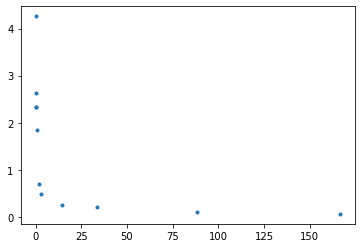

In [14]:
cr = []
cr_err = []
q = []
q_err = []
q_std = []

n_events = 10000
file_to_ana = get_files(files_puth1)
for i_file in file_to_ana:
    q_all = do_waveform_ana(files_puth1 + i_file, 6, 16, int(551/5))
    
    q_tmp = np.mean(q_all)
    std_tmp = np.std(q_all)
    
    q.append(q_tmp)
    q_std.append(std_tmp)
    
    q_err_tmp = std_tmp/(math.sqrt(n_events))
    q_err.append(q_err_tmp)
    
    cr_err.append( std_tmp*q_err_tmp/(q_tmp*q_tmp))
    cr.append(std_tmp/q_tmp)
    
npe1 = np.array(q)/0.07
plt.plot(npe1, cr, '.')

In [9]:
all_cr = cr
all_pr1 = npe1

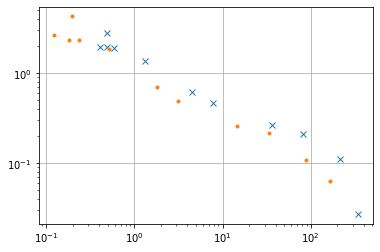

In [16]:
plt.plot(all_pr1, all_cr, 'x')
plt.plot(npe1, cr, '.')
plt.xscale('log')
plt.yscale('log')
plt.grid()

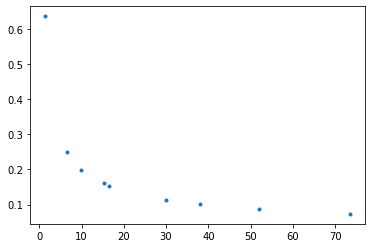

In [26]:
cr3 = []
cr3_err = []
q3 = []
q3_err = []
q3_std = []

n_events = 10000
file_to_ana = get_files(files_puth3)
for i_file in file_to_ana:
    q_all = do_waveform_ana(files_puth3 + i_file, 6, 16, int(559/10))
    
    q3_tmp = np.mean(q_all)
    std_tmp = np.std(q_all)
    
    q3.append(q3_tmp)
    q3_std.append(std_tmp)
    
    q3_err_tmp = std_tmp/(math.sqrt(n_events))
    q3_err.append(q3_err_tmp)
    
    cr3_err.append( std_tmp*q3_err_tmp/(q3_tmp*q3_tmp))
    cr3.append(std_tmp/q3_tmp)
    
npe3 = np.array(q3)/0.07
plt.plot(npe3, cr3, '.')

In [27]:
all_cr33 = cr3
all_pr33 = npe3

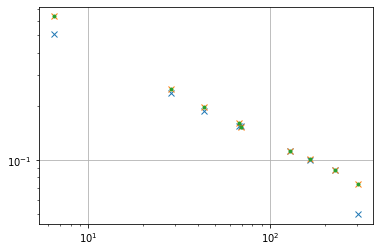

In [28]:
plt.plot(all_pr3, all_cr3, 'x')
plt.plot(all_pr3, all_cr33, 'x')
plt.plot(all_pr3, cr3, '.')
plt.xscale('log')
plt.yscale('log')
plt.grid()

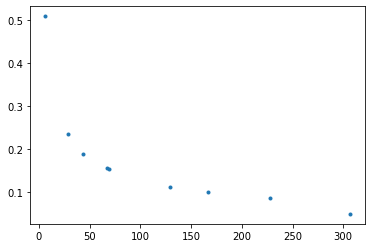

In [11]:
cr3 = []
cr3_err = []
q3 = []
q3_std = []

file_to_ana = get_files(files_puth3)

for i_file in file_to_ana:
    q_all = do_waveform_ana(files_puth3 + i_file, 6, 16, 559)
    
    q3.append(np.mean(q_all))
    q3_std.append(np.std(q_all))
    
    cr3.append(np.std(q_all)/np.mean(q_all))
    
npe3 = np.array(q3)/0.07
plt.plot(npe3, cr3, '.')

In [69]:
file_to_ana

['60.6laser_6.35.txt.root',
 '60.6laser_6.45.txt.root',
 '60.6laser_6.5.txt.root',
 '60.6laser_6.4.txt.root',
 '60.6laser_5.5.txt.root',
 '60.6laser_6.0.txt.root',
 '60.6laser_6.3.txt.root',
 '60.6laser.txt.root',
 '61.0laser.txt.root',
 '60.0laser.txt.root',
 '60.6laser_6.6.txt.root']

In [46]:
cr1 = []
q1 = []
q1_std = []
file_to_ana = get_files(files_puth1)

for i_file in file_to_ana:
    q_all = do_waveform_ana(files_puth1 + i_file, 6, 16, 553)
    
    q1.append(np.mean(q_all))
    q1_std.append(np.std(q_all))
    
    cr1.append(np.std(q_all)/np.mean(q_all))

In [120]:
index = np.array(q3)/0.07

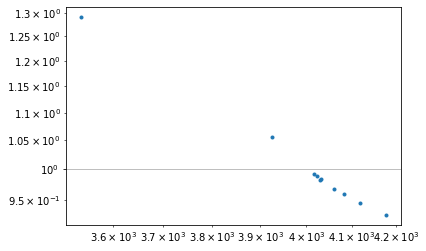

In [125]:
#index1 = np.array(q1)/0.07


plt.plot(ix3, cr3, '.')
plt.xscale('log')
plt.yscale('log')
#plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit')
plt.grid()
plt.show()

In [96]:
charge_resolution_poisson_gammas = []
gammas_poisson = np.arange(0.1, 700, 0.3)

for i in range(len(gammas_poisson)):
    charge_resolution_poisson_gammas.append(1./math.sqrt(gammas_poisson[i]))

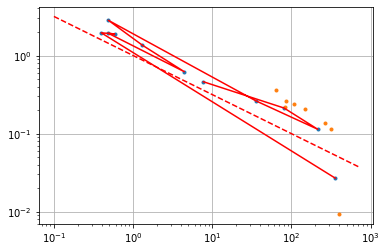

In [42]:
index = np.array(q)/0.07
index2 = np.array(q2)/0.07
index_err = np.array(q_err)/0.07


plt.plot(index, cr, '.')
plt.plot(index2, cr2, '.')
plt.errorbar(index, cr, xerr = index_err, yerr = cr_err, color = 'red',   label='Pxt =  5%, PDE = 37.20, NSB =  73.4 MHz')
plt.xscale('log')
plt.yscale('log')
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label='Poisson limit')
plt.grid()
plt.show()

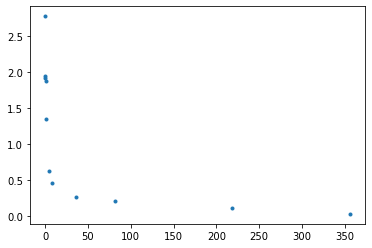

In [26]:
index2 = np.array(q2)/0.07


plt.plot(index2, cr2, '.')

In [91]:
np.array(q)/0.07

array([  0.39659611,   0.48756463,   0.48690579,   1.31267346,
         4.43764774,   7.73658464,  35.55768132,  80.79911173,
       215.16943103, 359.69806629,   0.58651062])

In [12]:
def read_files_data(path, cut, PDE):
    
    pixel = []
    npe = []
    cr = []
    cr_err = []
    
    n_pe_mean = []
    n_gamma_mean = []
    n_pe_std = []
    
    cr_mean = []
    cr_mean_err = []
    
    files = find_files(path, cut)
    
    for item, i_file in enumerate(files):
        #print(item)
        pixel_tmp = []
        n_pe_tmp = []
        n_pe_err_tmp = []
        cr_tmp = []
        cr_err_tmp = []
    
        pixel_tmp, n_pe_tmp, n_pe_err_tmp, cr_tmp, cr_err_tmp = read_data(path + i_file)
    
        pixel.append(pixel_tmp)
    
        npe.append(n_pe_tmp)
        cr.append(cr_tmp)
        cr_err.append(cr_err_tmp)
    
        n_pe_mean.append(np.mean(n_pe_tmp))
        n_pe_std.append(np.std(n_pe_tmp))
        n_gamma_mean.append(np.mean(n_pe_tmp)/PDE)
        cr_mean.append(np.mean(cr_tmp))
        cr_mean_err.append(np.mean(cr_err_tmp))
        
    #npe_fl = np.array(npe).flatten('C')
    #ngamma_fl = np.array(npe).flatten('C')/PDE
    #q_fl = np.array(cr).flatten('C')
    #q_err_fl = np.array(cr_err).flatten('C')

    my_sort(n_gamma_mean, cr_mean, cr_mean_err, n_pe_std)
    
    return n_gamma_mean, n_pe_std, cr_mean, cr_mean_err, npe, cr, cr_err

In [13]:
def read_simple_data(filename, n_skip):
   
    wavelength = []
    transmissivity = []

    with open(filename, "r") as file:
        lines = file.readlines()[n_skip:]
        for line in lines:
            words = line.split()
            #print(words[0], words[1])
            #print(words[0], ' ; ', words[1])    
            wavelength.append(float(words[0]))
            transmissivity.append(float(words[1]))
                
    return wavelength, transmissivity

In [14]:
def find_files(path, cut):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    files = []
    for i_file in onlyfiles:
        if i_file[0] != '.':
            if (cut in i_file) or ("2k" in i_file) or ("1k" in i_file):
                files.append(i_file)
            
    return files

In [15]:
def swap_elements(a, b):
    tmp = a
    a = b
    b = tmp
    return a, b

In [16]:
def my_sort(a, b, a_err, b_err):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])
                a_err[i], a_err[j] = swap_elements(a_err[i], a_err[j])
                b_err[i], b_err[j] = swap_elements(b_err[i], b_err[j])

In [51]:
def my_sort_3el(a, b, a_err):
    
    for i in range (len(a)):
        for j in range (i+1, len(a), 1):
            if(a[i]>a[j]):
                a[i], a[j] = swap_elements(a[i], a[j])
                b[i], b[j] = swap_elements(b[i], b[j])
                a_err[i], a_err[j] = swap_elements(a_err[i], a_err[j])

In [17]:
def read_data(filename):
   
    pixel = []
    n_pe = []
    n_pe_err = []
    q_res = []
    q_res_err = []

    with open(filename, "r") as file:
        lines = file.readlines()[1:]
        for line in lines:
            words = line.split()
        
            if len(words) == 4:
                pixel.append(float(words[0]))
                n_pe.append(float(words[1]))
                q_res.append(float(words[2]))
                q_res_err.append(float(words[3]))
                
            elif len(words) == 5:
                pixel.append(float(words[0]))
                n_pe.append(float(words[1]))
                n_pe_err.append(float(words[2]))
                q_res.append(float(words[3]))
                q_res_err.append(float(words[4]))
                
    return pixel, n_pe, n_pe_err, q_res, q_res_err

In [18]:
pde_hkb_borofloat_8 = 0.18843703333692147
n_gamma_hkb_8_mean, n_pe_hkb_8_std, cr_hkb_8_mean, cr_hkb_8_mean_err, npe_hkb_8, cr_hkb_8, cr_hkb_8_err = read_files_data("/home/andrii/work/sim_telarray/charge_resolution/pxt_0.25/LCT2/PMMA/nsb_0.3049/Cherenkov/PDE_46/", "4k", pde_hkb_borofloat_8)

npe_hkb_8_mean = pde_hkb_borofloat_8*np.array(pde_hkb_borofloat_8)
npe_hkb_8_fl = np.array(npe_hkb_8).flatten('C')
ngamma_hkb_8_fl = np.array(npe_hkb_8).flatten('C')/pde_hkb_borofloat_8
q_hkb_8_fl = np.array(cr_hkb_8).flatten('C')
q_hkb_8_err_fl = np.array(cr_hkb_8_err).flatten('C')

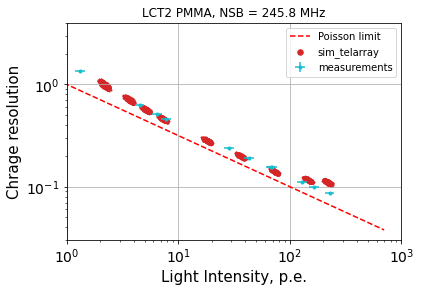

In [128]:
lambda_plot = 1
point_size = 1

plt.scatter(npe_hkb_8_fl, q_hkb_8_fl,  alpha=lambda_plot, s=point_size, color = 'tab:red', label='sim_telarray')
#plt.errorbar(pe_mes, cr_mes, xerr=0.1*pe_mes, yerr=cr_mes_err, fmt='o', label='measurements')
plt.errorbar(pe_mes_cor, cr_mes_cor, xerr=0.1*pe_mes_cor, yerr=cr_mes_err_cor, fmt='.', color = 'tab:cyan', label='measurements')
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label = "Poisson limit")

plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylim([0.03, 4])
plt.xlim([1, 1000])

lgnd = plt.legend(fontsize=10)

lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1].set_alpha(1)

plt.title('LCT2 PMMA, NSB = 245.8 MHz')
plt.xlabel('Light Intensity, p.e.',  fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Chrage resolution', fontsize=15)
plt.yticks(fontsize=14)
#plt.yticks(fontsize=3)
plt.savefig('charge_resolution_pe_Pxt_25_measuremetns.png', dpi=800)
plt.show()

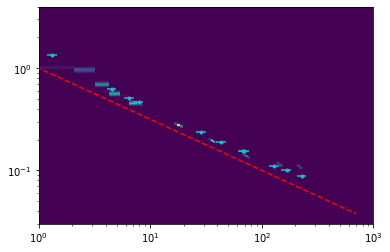

In [122]:
plt.hist2d(npe_hkb_8_fl, q_hkb_8_fl, range=[ [1, 1000], [0.03, 4]], bins=900)
plt.errorbar(pe_mes_cor, cr_mes_cor, xerr=0.1*pe_mes_cor, yerr=cr_mes_err_cor, fmt='.', color = 'tab:cyan', label='measurements')
plt.plot(gammas_poisson, charge_resolution_poisson_gammas, '--r', label = "Poisson limit")

plt.xscale('log')
plt.yscale('log')

In [104]:
pe_mes_cor = np.delete(pe_mes, -3)
cr_mes_cor = np.delete(cr_mes, -3)
cr_mes_err_cor = np.delete(cr_mes_err, -3)

In [67]:
cr3 = np.delete(cr3, 5)
cr3_err = np.delete(cr3_err, 5)
npe3 = np.delete(npe3, 5)

In [66]:
npe3

array([227.70506737,  43.19678302,  67.28597032, 166.31283559,
         6.47471606, 306.39990964,  69.22432004,  28.47162643,
       129.13098339])

In [82]:
cr = np.delete(cr, 2)
cr_err = np.delete(cr_err, 2)
npe1 = np.delete(npe1, 2)

In [80]:
npe1

array([  7.85056007, 215.87561186,  35.99254261,   0.4958891 ,
         1.32530604,   4.5137425 ,   0.49365093,   0.59271191,
         0.4046961 , 346.34201348])

In [84]:
cr_mes = np.append(cr, cr3)
cr_mes

array([0.46354213, 0.11066081, 2.79913474, 1.35285946, 0.62315023,
       1.92778956, 1.90382884, 1.96327672, 0.02734247, 0.08749483,
       0.18859911, 0.15532824, 0.10017025, 0.50897186, 0.15508599,
       0.23632002, 0.11173144])

In [86]:
cr_mes_err = np.append(cr_err, cr3_err)
cr_mes_err

array([2.14871307e-03, 1.22458140e-04, 7.83515530e-02, 1.83022872e-02,
       3.88316209e-03, 3.71637259e-02, 3.62456424e-02, 3.85445548e-02,
       7.47610446e-06, 7.65534442e-05, 3.55696229e-04, 2.41268630e-04,
       1.00340785e-04, 2.59052352e-03, 2.40516651e-04, 5.58471510e-04,
       1.24839145e-04])

In [85]:
pe_mes = np.append(npe1, npe3)
pe_mes

array([  7.85056007, 215.87561186,   0.4958891 ,   1.32530604,
         4.5137425 ,   0.49365093,   0.59271191,   0.4046961 ,
       346.34201348, 227.70506737,  43.19678302,  67.28597032,
       166.31283559,   6.47471606,  69.22432004,  28.47162643,
       129.13098339])

In [54]:
pe_mes_err = 0.1*pe_mes

In [47]:
pe_mes_err

array([ 0.54953921, 15.11129283,  0.03471224,  0.09277142,  0.31596197,
        0.03455556,  0.04148983,  0.02832873, 24.24394094, 15.93935472,
        3.02377481,  4.71001792, 11.64189849,  0.45323012,  4.8457024 ,
        1.99301385,  9.03916884])

In [87]:
my_sort(pe_mes, cr_mes, pe_mes_err, cr_mes_err)